<a href="https://colab.research.google.com/github/Fiona-cherutto/Data-Science-Core/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2020_07_FIONA_CHERUTTO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question


We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.



In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason for the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

What is our hypothesis/ Research Question

Hypothesis testing using a z-score.

A sample from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays

(H0: μ1=μ2)

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays

(H1:μ1≠μ2)

### b) Defining the Metric for Success

The project will be considered as success if the null hypothesis is proven true.

### c) Understanding the context 

Autolib was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on July 31st 2018. It was operated by the Bollore industrial group, and complemented the city's bike sharing scheme, Velib', which was set up in 2007. The Autolib' scheme maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription basis, employing a citywide network of parking and charging stations. As of 3 July 2016, 3,980 Bluecars had been registered for the service, and the scheme had more than 126,900 registered subscribers; Autolib' furthermore offered 1,084 electric car stations in Paris agglomeration with 5,935 charging points

### d) Recording the Experimental Design

For this analysis will follow the following steps below


1.   Loading and previewing data
2.   Data cleanining
3.   EDA
4.   Implimenting the solution
5.   Challenging the solution
6.   Follow up question

### e) Data Relevance

The data provided for the analysis consist of Autolib information  provided Autolib dataset.

In [ ]:
%%html
<marquee style='width: 70%; color: green;'><b>We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.!</b></marquee>

## 2. Loading dataset

In [4]:
from google.colab import files
files.upload()

!unzip -q Autolib_Dataset.zip
!pip install --upgrade seaborn

Saving columns_explanation.xlsx to columns_explanation.xlsx
Saving autolib_daily_events_postal_code.csv to autolib_daily_events_postal_code.csv


{'autolib_daily_events_postal_code.csv': b'\xef\xbb\xbfPostal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum\r\n75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20\r\n75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22\r\n75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27\r\n75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21\r\n75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20\r\n75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35\r\n75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34\r\n75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15\r\n75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15\r\n75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22\r\n75001,1/11/2018,1440,3,weekday,125,125,3,4,13,13,22,22\r\n75001,1/12/2018,1439,4,weekday,126,127,3,2,12,12,11,13\r\n75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38\r\n75001,1/14

unzip:  cannot find or open Autolib_Dataset.zip, Autolib_Dataset.zip.zip or Autolib_Dataset.zip.ZIP.
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


## 3. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

## 4. Reading the Data

In [5]:
# Loading the Data from the source i.e. csv
# ---
Autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Autolib_description = pd.read_excel('/content/columns_explanation.xlsx')


## 5. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(f'\nAutolib  contains {Autolib.shape[0]} samples and {Autolib.shape[1]} variables')
print(f'\nAutolib description contains {Autolib_description.shape[0]} samples and {Autolib_description.shape[1]} variables')

features = [c for c in Autolib.columns if c not in []]
print(f'\nThe dataset contains {len(features)} features')


Autolib  contains 16085 samples and 13 variables

Autolib description contains 13 samples and 2 variables

The dataset contains 13 features


In [ ]:
# Previewing the top of our dataset
#Autolib description
Autolib.head()

Postal code      date  ...  Slots_freed_sum  Slots_taken_sum
0        75001  1/1/2018  ...               22               20
1        75001  1/2/2018  ...               23               22
2        75001  1/3/2018  ...               27               27
3        75001  1/4/2018  ...               25               21
4        75001  1/5/2018  ...               18               20

[5 rows x 13 columns]

In [ ]:
# Previewing Autolib description dataset
Autolib_description.head()


Column name                                        explanation
0          Postal code                 postal code of the area (in Paris)
1                 date                        date of the row aggregation
2  n_daily_data_points  number of daily data poinst that were availabl...
3            dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
4             day_type                                 weekday or weekend

In [ ]:
# Previewing the bottom of our dataset
Autolib.tail()

Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[5 rows x 13 columns]

In [ ]:
# Checking whether each column has an appropriate datatype
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 4. External Data Source Validation

### a.Validation

In [ ]:
# Map the lowering function to all column names

Autolib.columns = map(str.lower, Autolib.columns)
Autolib

postal code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#
#cheaking outliers and removing
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)  
IQR = Q3 - Q1
# Removing outliers based on the IQR range and stores the result in the data frame 'Autolib_out'

Autolib_out = Autolib[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
# Printing the shape of our new dataset

print(Autolib_out.shape)

(9783, 13)


In [ ]:
# Printing the shape of our old dataset

print(Autolib.shape)

(16085, 13)


In [ ]:
# Checking for Anomalies
#
q1_year = Autolib['date'].quantile(.25)
q3_year = Autolib['date'].quantile(.75)

iqr_year = q3_year - q1_year


q1_bluecars_taken_sum = Autolib['bluecars_taken_sum'].quantile(.25)
q3_bluecars_taken_sum = Autolib['bluecars_taken_sum'].quantile(.75)

iqr_bluecars_taken_sum = q3_bluecars_taken_sum - q1_bluecars_taken_sum

q1_bluecars_returned_sum  = Autolib['bluecars_returned_sum '].quantile(.25)
q3_bluecars_returned_sum  = Autolib['bluecars_returned_sum '].quantile(.75)

iqr_bluecars_returned_sum  = q3_bluecars_returned_sum  - q1_bluecars_returned_sum 

q1_3, q3_3 = np.percentile(Autolib['date'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_date - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)

print(iqr_date, iqr)

In [ ]:
# Identifying the Missing Data
# We count the number of non - missing values in the df dataframe
#
Autolib.count()

postal code               16085
date                      16085
n_daily_data_points       16085
dayofweek                 16085
day_type                  16085
bluecars_taken_sum        16085
bluecars_returned_sum     16085
utilib_taken_sum          16085
utilib_returned_sum       16085
utilib_14_taken_sum       16085
utilib_14_returned_sum    16085
slots_freed_sum           16085
slots_taken_sum           16085
dtype: int64

In [ ]:
# cheacking unique
Autolib.nunique()

postal code               104
date                      156
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64

In [ ]:
# Dealing with the Missing Data
# count those missing values in our dataframe
#

np.count_nonzero(Autolib.isnull())

0

In [ ]:
# Checking if there is any missing value in dataframe as a whole

Autolib.isnull().any()

postal code               False
date                      False
n_daily_data_points       False
dayofweek                 False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

In [ ]:
# Let's see these non-duplicate files
Autolib.duplicated().any()


False

In [ ]:
# replace all splces with "_"
Autolib.columns = Autolib.columns.str.replace(' ','_')
print (Autolib)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]


In [ ]:
#What unique values are there in each column entry in the dataset?
for i in Autolib.columns:
 print(Autolib[i].unique())
 print ("\n")

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2

In [ ]:
# replace all  with 0 or 1
Autolib['day_type'].unique()
#Autolib['day_type'].replace(0, 'weekend')
#Autolib['day_type'].replace(1, 'weekday')
Autolib['day_type'].replace(['weekend','weekday'],[0 , 1])
Autolib['day_type']=Autolib['day_type'].replace(['weekend','weekday'],[0 , 1])

array(['weekday', 'weekend'], dtype=object)

0        1
1        1
2        1
3        1
4        1
        ..
16080    1
16081    0
16082    0
16083    1
16084    1
Name: day_type, Length: 16085, dtype: int64

In [ ]:
Autolib['bluecars_taken_sum'].sum()

2025535

In [ ]:
Autolib.sum()

postal_code                                                      1428207962
date                      1/1/20181/2/20181/3/20181/4/20181/5/20181/6/20...
n_daily_data_points                                                23022953
dayofweek                                                             47766
day_type                  weekdayweekdayweekdayweekdayweekdayweekendweek...
bluecars_taken_sum                                                  2025535
bluecars_returned_sum                                               2025306
utilib_taken_sum                                                      59487
utilib_returned_sum                                                   59500
utilib_14_taken_sum                                                  138340
utilib_14_returned_sum                                               138318
slots_freed_sum                                                      363988
slots_taken_sum                                                      363992
dtype: objec

In [ ]:
Autolib['day_type'].value_counts(normalize=True)

weekday    0.717687
weekend    0.282313
Name: day_type, dtype: float64

In [ ]:
Autolib['bluecars_taken_sum'].value_counts(normalize=True)

12      0.016226
14      0.015729
9       0.015356
11      0.015294
13      0.014796
          ...   
833     0.000062
825     0.000062
809     0.000062
801     0.000062
1335    0.000062
Name: bluecars_taken_sum, Length: 932, dtype: float64

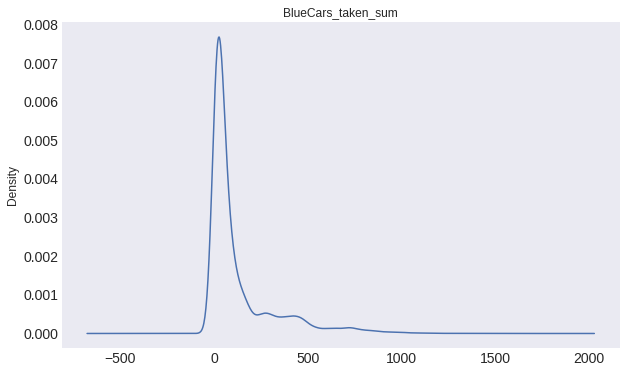

In [ ]:
_ = Autolib["bluecars_taken_sum"].plot(kind = 'density', title = 'BlueCars_taken_sum', fontsize=14, figsize=(10, 6))

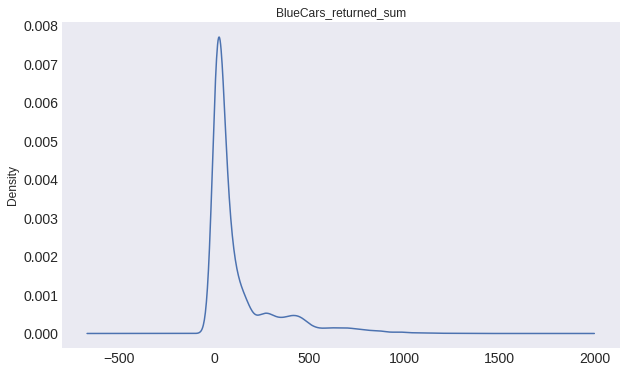

In [ ]:
_= Autolib["bluecars_returned_sum"].plot(kind = 'density', title = 'BlueCars_returned_sum', fontsize=14, figsize=(10, 6))

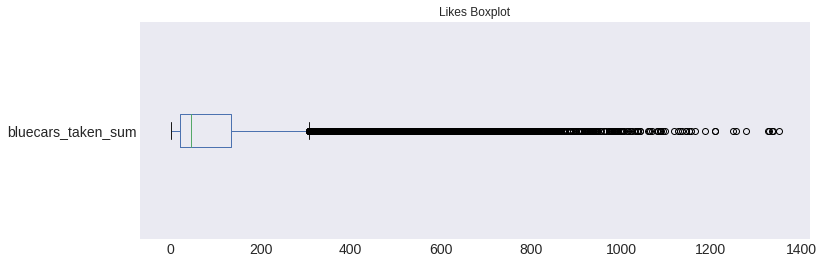

In [ ]:
_ = Autolib["bluecars_taken_sum"].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Likes Boxplot', fontsize=14)

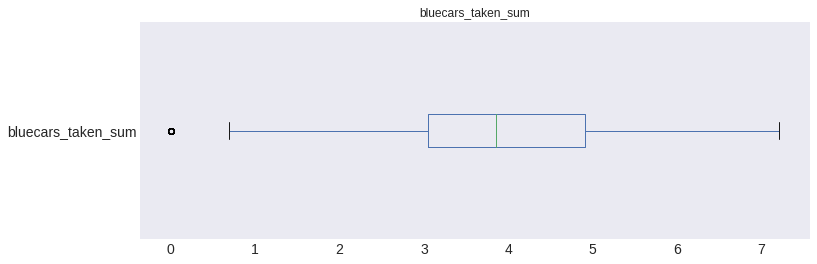

In [ ]:
_ = pd.Series(np.log1p(Autolib["bluecars_taken_sum"])).plot(kind = 'box',
                                                vert=False,
                                                figsize=(12, 4),
                                                title = 'bluecars_taken_sum',
                                                fontsize=14)

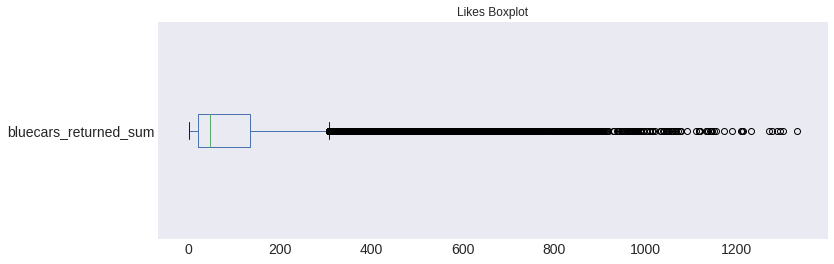

In [ ]:
_ = Autolib["bluecars_returned_sum"].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Likes Boxplot', fontsize=14)

## 6. Exploratory Analysis

In [ ]:
#colums name
Autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# categorizing colums
num_cols =['postal_code','n_daily_data_points','dayofweek','bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
     

In [ ]:
date_cols =['date','day_type']

In [7]:
#Description of all the numerical data columns
Auto_num = Autolib.describe()
Auto_num

Postal code  n_daily_data_points  ...  Slots_freed_sum  Slots_taken_sum
count  16085.000000         16085.000000  ...     16085.000000     16085.000000
mean   88791.293876          1431.330619  ...        22.629033        22.629282
std     7647.342000            33.212050  ...        52.120263        52.146030
min    75001.000000          1174.000000  ...         0.000000         0.000000
25%    91330.000000          1439.000000  ...         0.000000         0.000000
50%    92340.000000          1440.000000  ...         0.000000         0.000000
75%    93400.000000          1440.000000  ...         5.000000         5.000000
max    95880.000000          1440.000000  ...       360.000000       359.000000

[8 rows x 11 columns]

1. Univariate Analysis - Boxplots

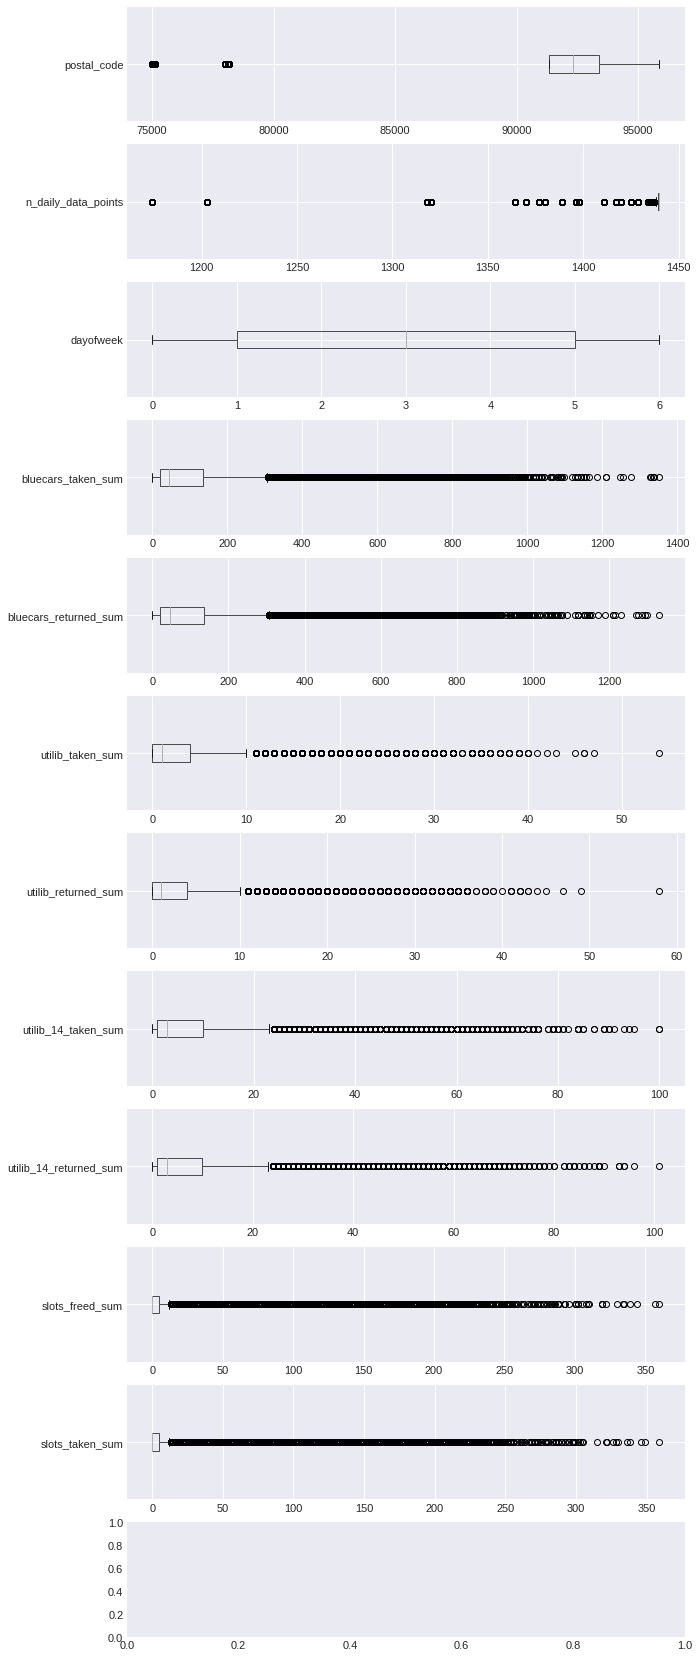

In [ ]:
# visualizing using boxplot

fig, axes = plt.subplots(12, 1, figsize=(10, 30))
for i, c in enumerate(num_cols):
  _ = Autolib[[c]].boxplot(ax=axes[i], vert=False)

### 2. Univariate Analysis - Density Plots

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

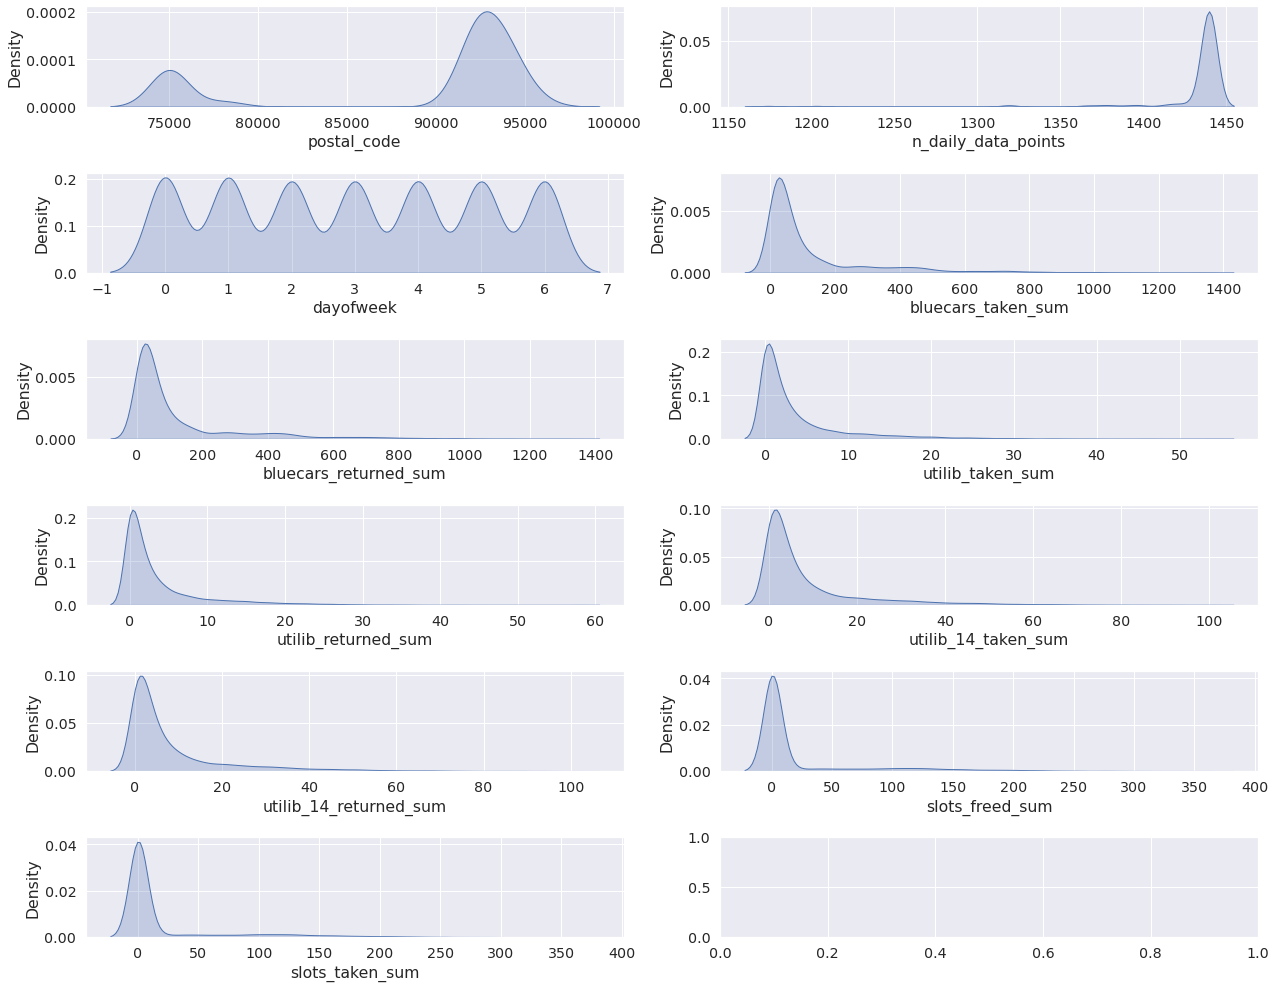

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(6, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=Autolib, x=c, ax=axes[i], fill=True)
plt.tight_layout()

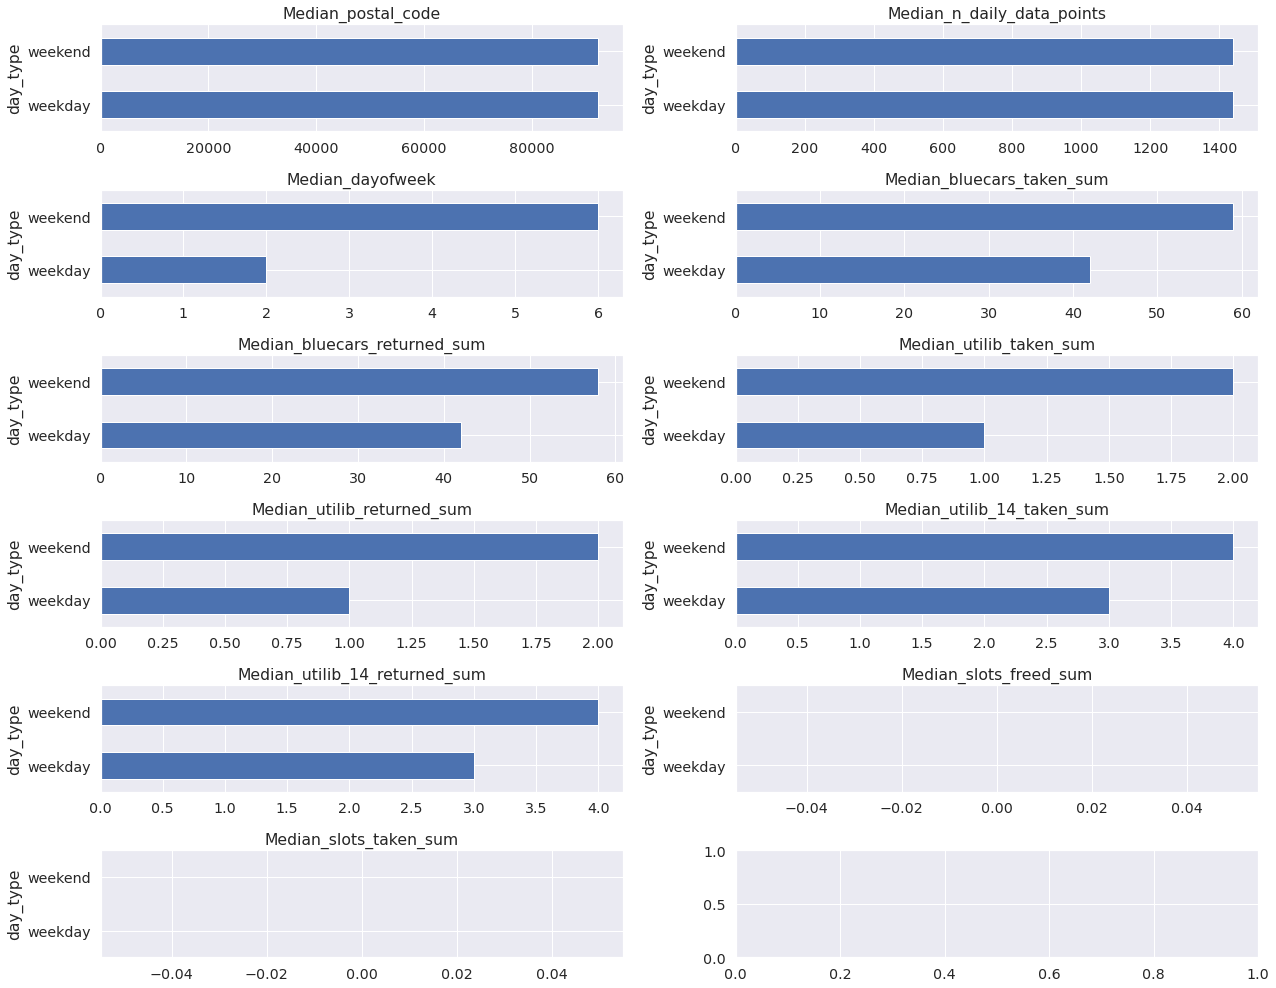

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(6, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = Autolib.groupby("day_type")[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()



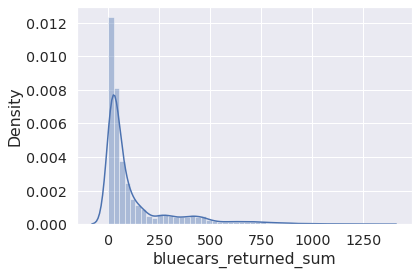

In [ ]:
# univariate analysis: bluecars_returned_sum variable
sns.distplot(Autolib.bluecars_returned_sum);

Observation: The 'bluecars_returned_sum' variable is not normally distributed. It is skewed to the right.

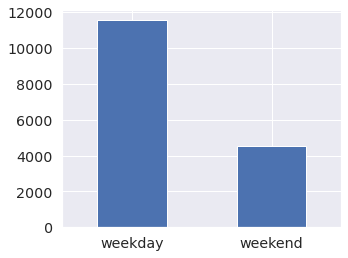

In [ ]:
# univariate analysis: day_type variable
plt.figure(figsize = (5, 4))
Autolib.day_type.value_counts().plot(kind = 'bar', rot = 0);

Observation: There are more weekdays records in our dataset which is replesented as "1" than weekend records which is represented as "0".

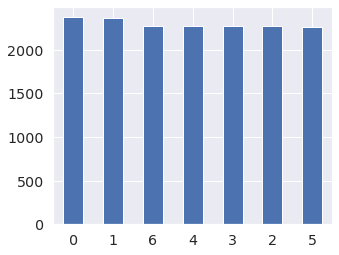

In [ ]:
# univariate analysis: job variable
plt.figure(figsize = (5, 4))
Autolib.dayofweek.value_counts().plot(kind = 'bar', rot = 0);

**Obrervation**: day 0  has more records, followed by group 1, 6,4,3,2 then 5 as the last

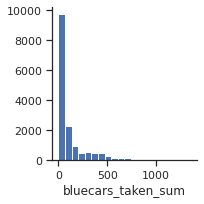

In [ ]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)

fig, axes =  figsize=(10, 14)
bt_hist = sns.FacetGrid(Autolib)
bt_hist.map(plt.hist, 'bluecars_taken_sum', bins=20)

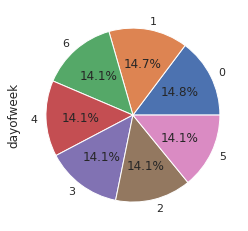

In [ ]:
Autolib.dayofweek.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

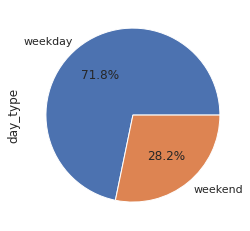

In [ ]:
Autolib.day_type.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [ ]:
Autolib.dtypes

postal_code                int64
date                      object
n_daily_data_points        int64
dayofweek                  int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

### Measures of Central Tendency

In [ ]:
#Median
Autolib.bluecars_taken_sum.median()

46.0

In [ ]:
#Median
Autolib.bluecars_returned_sum.median()

46.0

In [ ]:
#Mean
Autolib.bluecars_taken_sum.mean()

125.92695057506994

In [ ]:
#Mean
Autolib.bluecars_returned_sum.mean()

125.912713708424

### Measures of Dispersion

### Standard Deviation

In [ ]:
# Finding the standard deviation

Autolib["bluecars_returned_sum"].std()

185.50153480148427

In [ ]:
# Finding the standard deviation

Autolib["bluecars_taken_sum"].std()

185.42657876727893

### Variance

In [ ]:
# Finding the Variance
Autolib["bluecars_taken_sum"].var()

34383.01611333789

In [ ]:
# Finding the Variance
Autolib["bluecars_returned_sum"].var()

34410.819413706275

### Range

In [ ]:
# Finding the min and max values of the householeds average prices
Autolib_max = Autolib["bluecars_taken_sum"].max()
Autolib_min = Autolib["bluecars_taken_sum"].min()

# Calculating the range
Autolib_max - Autolib_min


1352

In [ ]:
# Finding the min and max values of the householeds average prices
Autolib_max = Autolib["bluecars_returned_sum"].max()
Autolib_min = Autolib["bluecars_returned_sum"].min()

# Calculating the range
Autolib_max - Autolib_min


1332


### Inter-Quartile Range

In [ ]:
# Finding the quantiles of the herbicide average prices
Autolib["bluecars_taken_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# Finding the quantiles of the herbicide average prices
Autolib["bluecars_returned_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

### Skewness

In [ ]:
# Determining the skeweness
Autolib["bluecars_taken_sum"].skew()

2.4063548974959086

In [ ]:
# Determining the skeweness
Autolib["bluecars_returned_sum"].skew()

2.412084978838923

### Kurtosis 

In [ ]:
# Determining the Kurtosis 
Autolib["bluecars_taken_sum"].kurt()

6.172692305510042

In [ ]:
# Determining the Kurtosis 
Autolib["bluecars_returned_sum"].kurt()

6.1862880957582345

In [ ]:
# Example 7: Displaying the summary statistics of the dataframe
#
Autolib["bluecars_taken_sum"].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

In [ ]:
# Example 7: Displaying the summary statistics of the dataframe
#
Autolib["bluecars_returned_sum"].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

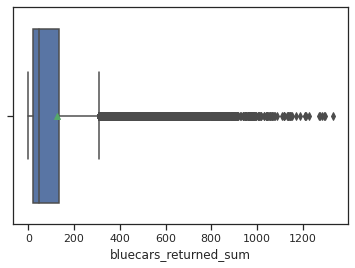

In [ ]:
#Boxplot
sns.boxplot(Autolib['bluecars_returned_sum'],showmeans = True)

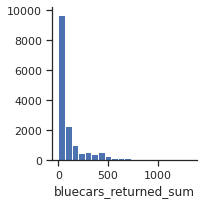

In [ ]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)
bt_hist = sns.FacetGrid(Autolib)
bt_hist.map(plt.hist, 'bluecars_returned_sum', bins=20)

In [ ]:
#check for correlation
Autolib.corr(method ='kendall')
# columns have either strong,weak nor no relationship at all with each other

postal_code  ...  slots_taken_sum
postal_code                1.000000  ...        -0.457624
n_daily_data_points        0.000470  ...         0.011151
dayofweek                  0.000308  ...         0.009588
bluecars_taken_sum        -0.353530  ...         0.522921
bluecars_returned_sum     -0.354069  ...         0.523802
utilib_taken_sum          -0.346462  ...         0.505384
utilib_returned_sum       -0.347097  ...         0.505082
utilib_14_taken_sum       -0.341879  ...         0.508425
utilib_14_returned_sum    -0.341231  ...         0.508558
slots_freed_sum           -0.457003  ...         0.976133
slots_taken_sum           -0.457624  ...         1.000000

[11 rows x 11 columns]

In [ ]:
# data info
Autolib.describe()

postal_code  n_daily_data_points  ...  slots_freed_sum  slots_taken_sum
count  16085.000000         16085.000000  ...     16085.000000     16085.000000
mean   88791.293876          1431.330619  ...        22.629033        22.629282
std     7647.342000            33.212050  ...        52.120263        52.146030
min    75001.000000          1174.000000  ...         0.000000         0.000000
25%    91330.000000          1439.000000  ...         0.000000         0.000000
50%    92340.000000          1440.000000  ...         0.000000         0.000000
75%    93400.000000          1440.000000  ...         5.000000         5.000000
max    95880.000000          1440.000000  ...       360.000000       359.000000

[8 rows x 11 columns]

Recommendations based on the Univariate Analysis

Both taken_sum columns and the returned_sum columns appears tobe almost similar.

The data has Outliers  and should not be dropped sine it will affect our data.

Data sets has high kurtosis which show that the distribution of data is not normally distributed with heavy tails

### 3. Bivariate Analysis KDE plots - Relationships with Target Variable.

Positive correlation is observed in the cars taken vs. cars returned columns i.e. Bluecars, Utilib and Utilib 14.

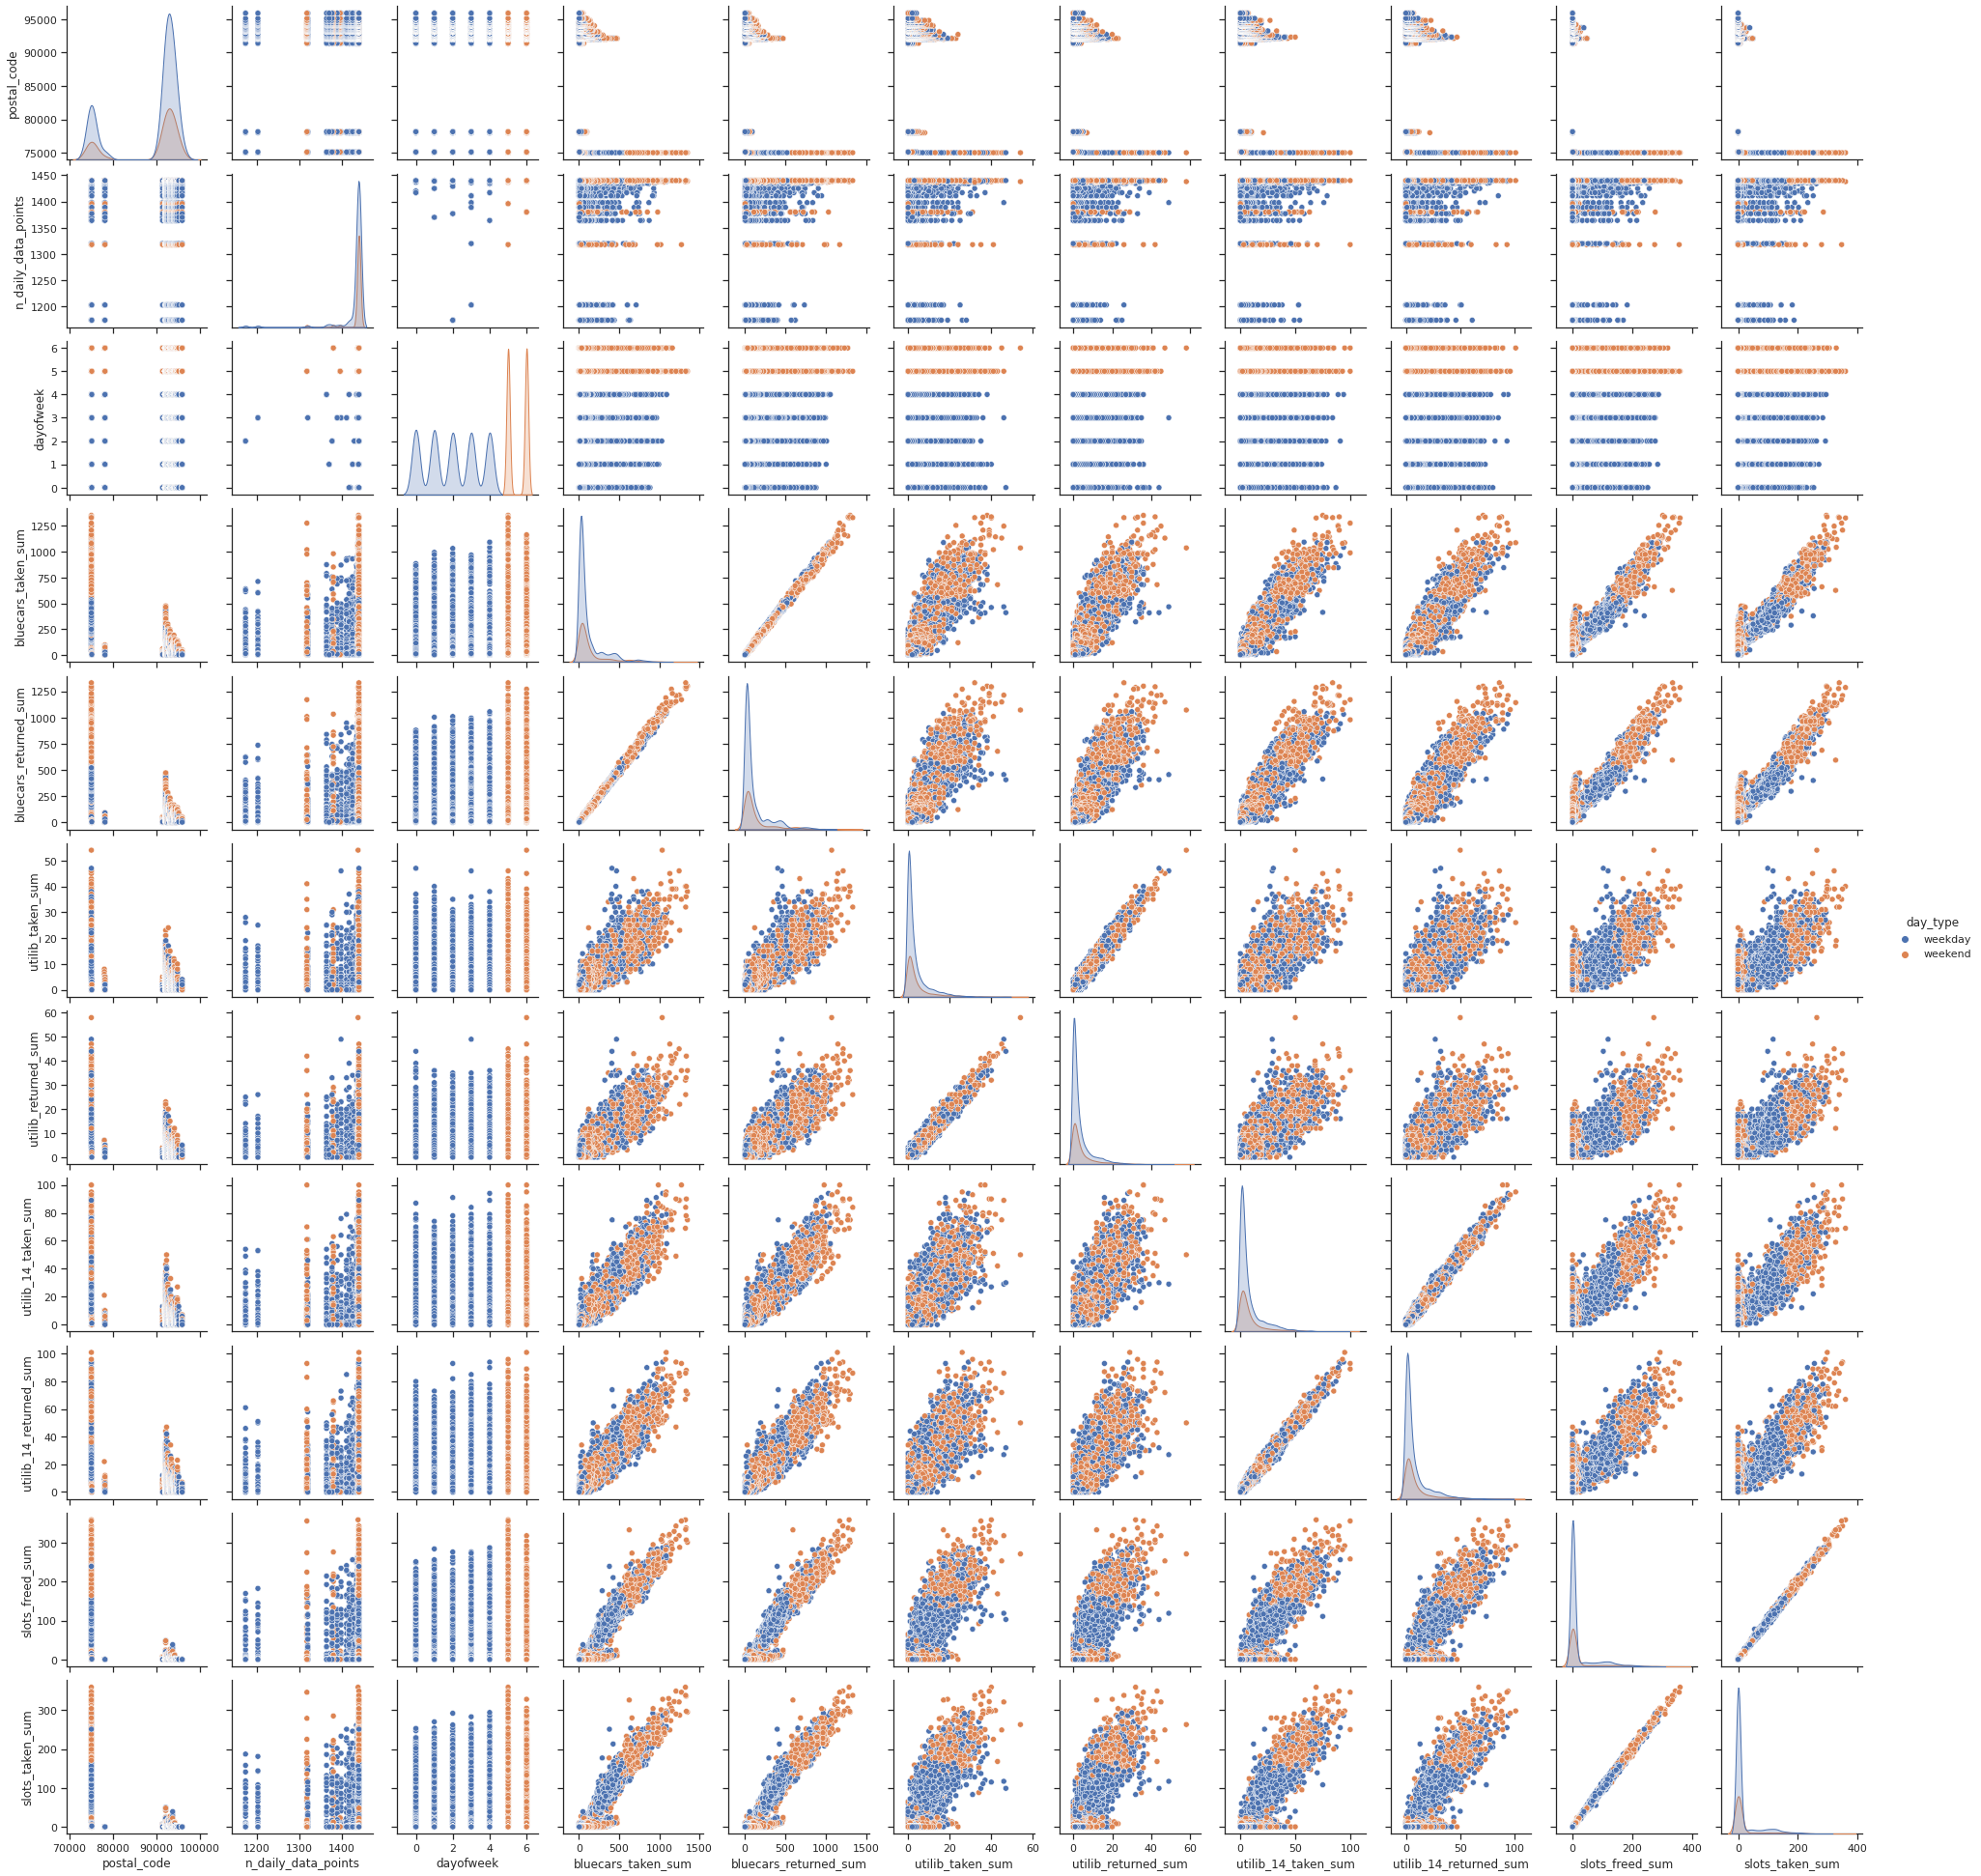

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
sns.pairplot(Autolib,hue = 'day_type')

In [ ]:

# Calculating the pearson coefficient
#
# Checking whether you have to define the pearson
coeff = Autolib["bluecars_returned_sum"].corr(Autolib["bluecars_taken_sum"]) 
print(coeff)


0.9986597051672199


 stronge positive correlation

In [ ]:
# Calculating the pearson coefficient
Autolib.corr() 

postal_code  ...  slots_taken_sum
postal_code                1.000000  ...        -0.749157
n_daily_data_points        0.000432  ...         0.021169
dayofweek                  0.000343  ...         0.050468
bluecars_taken_sum        -0.698020  ...         0.947996
bluecars_returned_sum     -0.697519  ...         0.948771
utilib_taken_sum          -0.625521  ...         0.853049
utilib_returned_sum       -0.624786  ...         0.852936
utilib_14_taken_sum       -0.656744  ...         0.898719
utilib_14_returned_sum    -0.656516  ...         0.899777
slots_freed_sum           -0.749528  ...         0.999221
slots_taken_sum           -0.749157  ...         1.000000

[11 rows x 11 columns]

Scatter plot

Text(0.5, 1.0, 'bluecars_returned_sum vs bluecars_taken_sum')

Text(0.5, 0, 'bluecars_returned_sum')

Text(0, 0.5, 'bluecars_taken_sum')

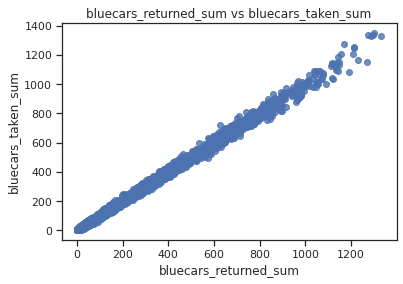

In [ ]:
# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = Autolib["bluecars_returned_sum"], y = Autolib["bluecars_taken_sum"], fit_reg=False)
# Giving our scatterplot a title
plt.title('bluecars_returned_sum vs bluecars_taken_sum')

# Labelling our x axis
plt.xlabel('bluecars_returned_sum')

# Labelling our y axis
plt.ylabel('bluecars_taken_sum')

# Displaying our scatterplot
plt.show()

from the scatter plot we can see a strong correlation 

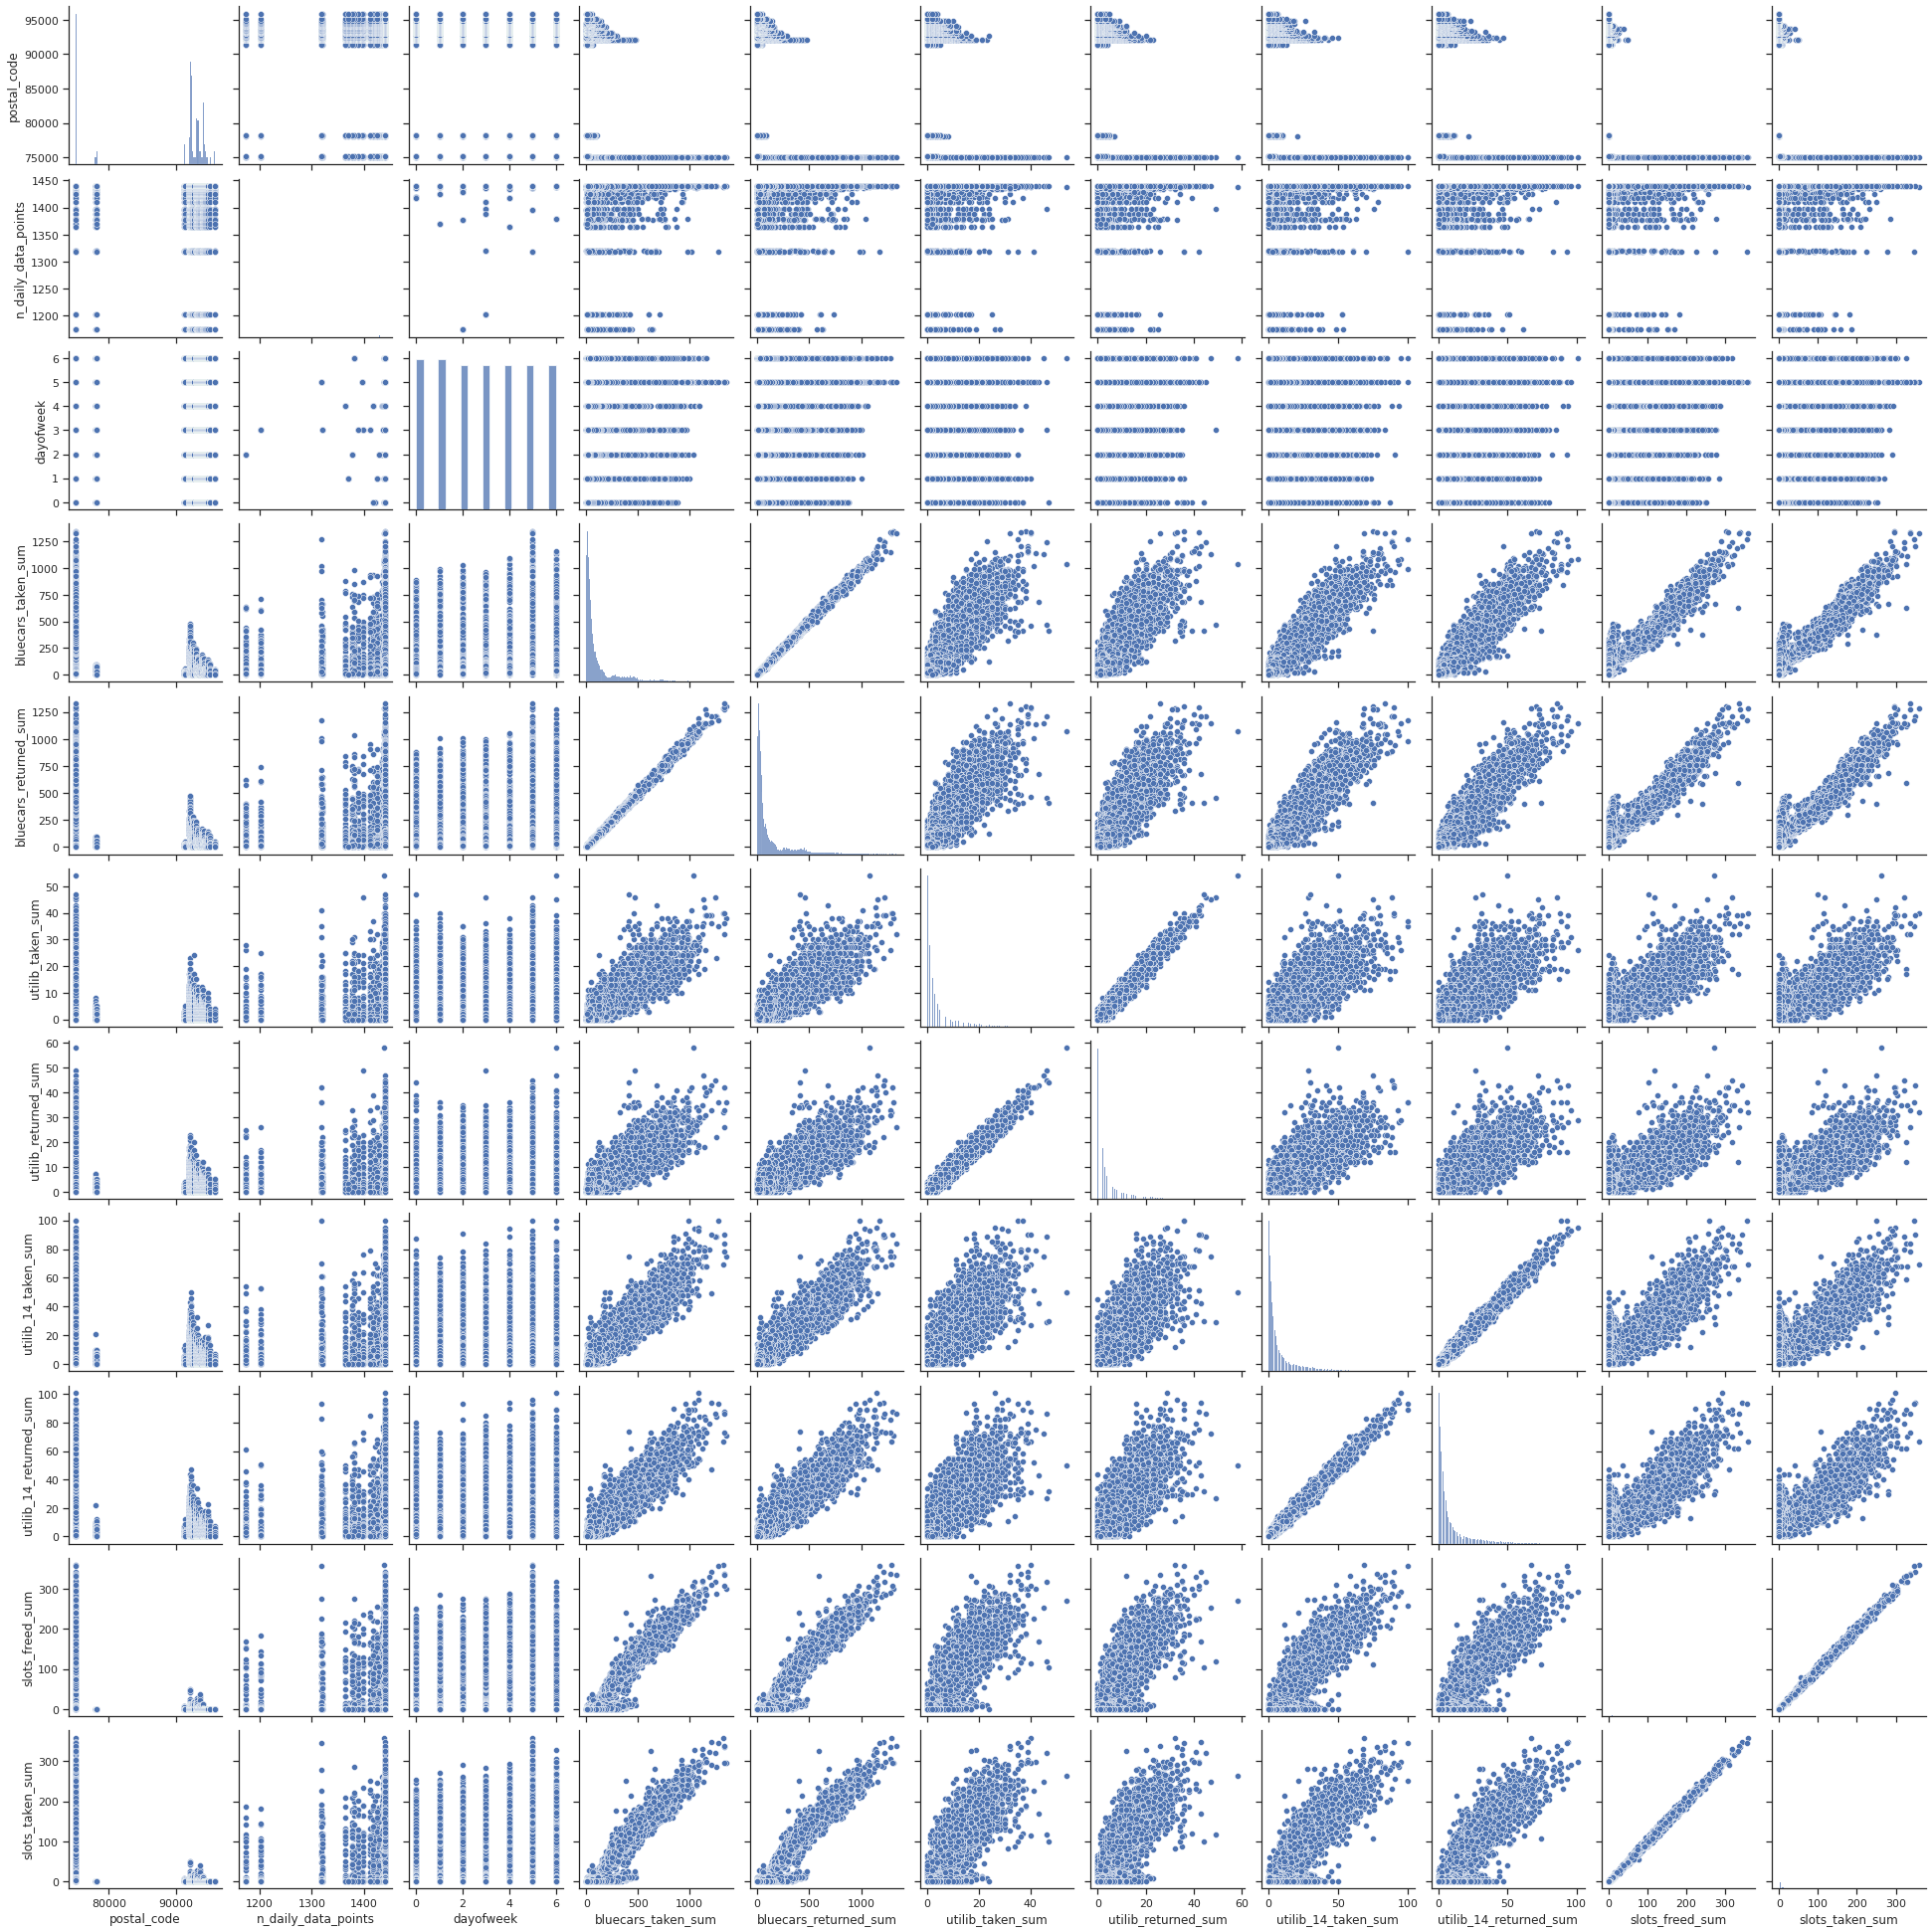

In [ ]:
sns.pairplot(Autolib)
plt.show()

<Figure size 936x864 with 0 Axes>

Text(0.5, 1.0, 'Heatmap showing Correlation of the Numerical Columns')

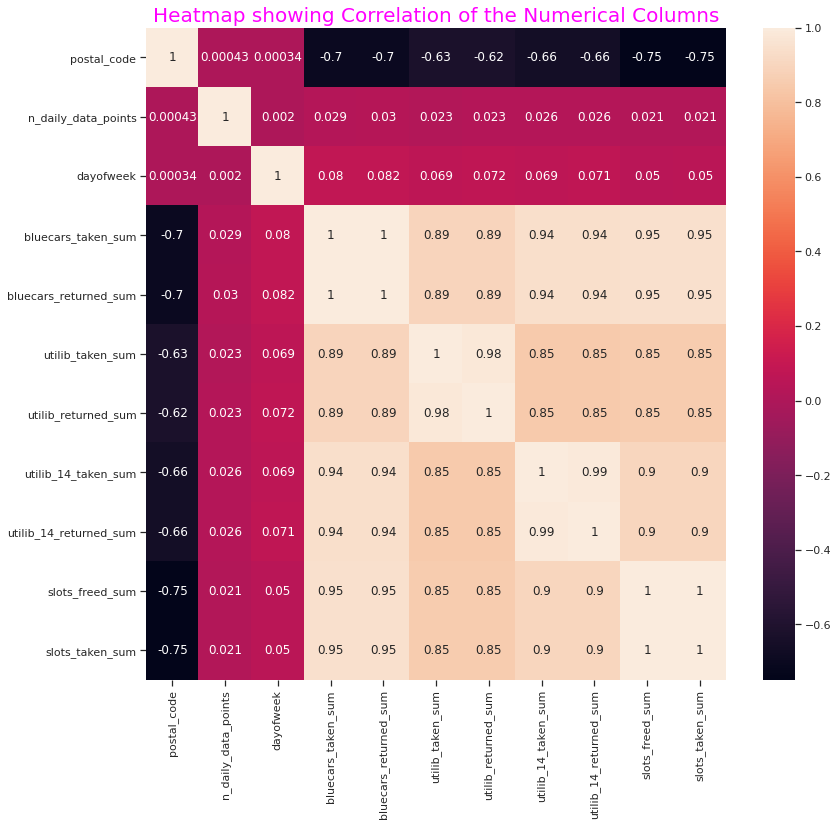

In [ ]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (13, 12))
sns.heatmap(Autolib.corr(), annot=True, );
plt.title('Heatmap showing Correlation of the Numerical Columns', color = 'magenta', fontsize = 20)



In [ ]:
# Data Reduction
#

## Multivariate Analysis

In [ ]:
#Split the categories into X and y
X = Autolib.drop(['date', 'postal_code'], axis =1)
y = Autolib['postal_code'].astype('int')

#Convert the categorical columns into binary formats
X1 =pd.get_dummies(X)

#Standardize the X values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X1)

#Implement ordinary least squares
import statsmodels.api as sm
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            postal_code   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1902.
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:47:17   Log-Likelihood:            -1.5995e+05
No. Observations:               16085   AIC:                         3.199e+05
Df Residuals:                   16073   BIC:                         3.200e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.879e+04     39.759   2233.237      0.0

## Hypothesis Testing
What is our hypothesis?

Hypothesis testing using a z-score.

A sample of 1200 values from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The number of Bluecars taken from postal code 75017 is the same as in postal code 75015 during weekdays

H0:= μ1=μ2

Alternative Hypothesis: The number of Bluecars taken from postal code 75017 is not the same as in postal code 75015 during weekdays

H1: = μ1≠μ2

## Sampling

for the analysis i will use Simple Random Sampling. reason to the choice of  Random samples its the best method of selecting your sample from the population of interest. The advantages it eliminates sampling bias and that sample represents the target population.

Sampling

In [ ]:
#Select a sample using Simple Random Sampling technique
df_sample = Autolib.sample(n=1200,replace='False')
print(df_sample)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
9717         92700   3/7/2018  ...                0                0
11072        93260  2/18/2018  ...               18               18
14022        94150   5/4/2018  ...                9                9
12883        93800  3/17/2018  ...                0                0
10520        93150   4/2/2018  ...                1                2
...            ...        ...  ...              ...              ...
5819         92190  2/20/2018  ...                0                0
7188         92290  1/16/2018  ...                0                0
12796        93700   6/5/2018  ...                1                1
11946        93370  6/13/2018  ...                0                0
12189        93400  6/17/2018  ...                0                0

[1200 rows x 13 columns]


In [ ]:
#Mean of the sample
df_sample.bluecars_taken_sum.mean()

129.03416666666666

In [ ]:
#Standard deviation of the sample
df_sample.bluecars_taken_sum.std()

195.03374443207213

### p-value

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
# zscore
zscore = ( 1200 - 125.406 ) / 187.87382398231466
zscore

4.655220091130573

In [ ]:
#import norm function from the scipy library
prob = 1 - stats.norm.cdf(zscore)
#prob = stats.norm.cdf(zscore)
prob

1.6181740329912486e-06

 the p-value is at 1.618, which is lower than the significance level. This means that the null hypothesis can be rejected, and it can be said that it's not common for athletes to finish 100m in 10 seconds

In [ ]:
#The selected periods of interest be either weekdays or weekends but not a mix of both. 
#You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

#postal codes 75015 vs weekends on areas of interest
df1 = df_sample[(df_sample.postal_code == 75015) & (df_sample.day_type == 'weekend')]
df1

postal_code       date  ...  slots_freed_sum  slots_taken_sum
2270        75015  3/31/2018  ...              309              301
2299        75015  4/29/2018  ...              195              187
2257        75015  3/18/2018  ...              282              287

[3 rows x 13 columns]

In [ ]:
#postal codes 75015 vs weekday on areas of interest
df1 = df_sample[(df_sample.postal_code == 75015) & (df_sample.day_type == 'weekday')]
df1

postal_code       date  ...  slots_freed_sum  slots_taken_sum
2261        75015  3/22/2018  ...              228              236
2191        75015   1/8/2018  ...              200              209
2304        75015   5/4/2018  ...              249              242
2276        75015   4/6/2018  ...              215              209
2201        75015  1/18/2018  ...              183              181
2274        75015   4/4/2018  ...              225              219
2184        75015   1/1/2018  ...              202              215
2253        75015  3/14/2018  ...              228              231
2287        75015  4/17/2018  ...              192              193
2187        75015   1/4/2018  ...              165              158
2331        75015  6/11/2018  ...              204              205
2214        75015  1/31/2018  ...              226              235
2200        75015  1/17/2018  ...              222              229

[13 rows x 13 columns]

In [ ]:
#postal codes 75017 vs weekends on areas of interest
df3 = df_sample[(df_sample.postal_code == 75017) & (df_sample.day_type == 'weekend')]
df3

postal_code      date  ...  slots_freed_sum  slots_taken_sum
2634        75017  6/2/2018  ...              243              242
2501        75017  1/6/2018  ...              223              219
2529        75017  2/3/2018  ...              251              255
2618        75017  5/6/2018  ...              199              208
2530        75017  2/4/2018  ...              236              238

[5 rows x 13 columns]

In [ ]:
#postal codes 75017 vs weekday on areas of interest
dfq = df_sample[(df_sample.postal_code == 75017) & (df_sample.day_type == 'weekday')]
dfq

postal_code       date  ...  slots_freed_sum  slots_taken_sum
2513        75017  1/18/2018  ...              156              153

[1 rows x 13 columns]

In [ ]:
# weekday on areas of interest
dfs = df_sample[(df_sample.day_type == 'weekday')]
dfs

postal_code       date  ...  slots_freed_sum  slots_taken_sum
9717         92700   3/7/2018  ...                0                0
14022        94150   5/4/2018  ...                9                9
10520        93150   4/2/2018  ...                1                2
13796        94140  2/20/2018  ...                0                0
11302        93300   5/7/2018  ...                0                0
...            ...        ...  ...              ...              ...
7307         92290  5/29/2018  ...                0                0
5819         92190  2/20/2018  ...                0                0
7188         92290  1/16/2018  ...                0                0
12796        93700   6/5/2018  ...                1                1
11946        93370  6/13/2018  ...                0                0

[850 rows x 13 columns]

In [ ]:
# weekends on areas of interest
dfs = df_sample[(df_sample.day_type == 'weekend')]
dfs

postal_code       date  ...  slots_freed_sum  slots_taken_sum
11072        93260  2/18/2018  ...               18               18
12883        93800  3/17/2018  ...                0                0
9221         92420   2/3/2018  ...                0                0
785          75006   1/6/2018  ...               67               69
13392        94110  4/28/2018  ...                0                0
...            ...        ...  ...              ...              ...
5931         92200   1/7/2018  ...                0                0
14917        94410  3/24/2018  ...                0                0
3408         75116  5/27/2018  ...                5                5
15392        94700   4/1/2018  ...                0                0
12189        93400  6/17/2018  ...                0                0

[350 rows x 13 columns]

Sample size = 1200

Mean of the population = 125.92695

Sample mean = 119.59333

Standard deviation of the sample = 173.35559

Confidence interval = 0.05

z-score = 4.65522

p-value = 1.61817

1.62 > 0.05

The difference in claim between the Bluecars taken from postal code 75017 and Bluecars taken from postal code 75015 group was not statistically significant.



The p-value is greater than the significance level,the null hypothesis is therefore taken to be true then we fail to reject the null hypothesis.
​	
The number of Bluecars taken from postal code 75017 is the same as in postal code 75015 during weekdays.

  After counting number of Bluecars taken from postal code 75017 and the other number of Bluecars taken from postal code 75015, I record whether or not number of Bluecars taken from both postal code 75017 and 75015 are same. After conducting my statistical analysis on the results, I determine a p-value of 1.62 That is above the desired significance level of 0.05, and thus I fail to reject the null hypothesis. Based on my experiment, there is no support for the (alternative) hypothesis that the number of Bluecars taken from postal code 75017 is not the same as in postal code 75015 during weekdays.

### Interval Estimation

In [ ]:
# Importing scipy.stats
import scipy.stats as stats


# Calculating the sample mean of final data
#
sample_mean = Autolib.mean()
sample_mean

# Finding the sample size
#
sample_size = Autolib.shape[0]
sample_size

# Finding the standard error of the mean of data 
#
std_error = Autolib.std() / np.sqrt(sample_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 9.87 and 10.28

164.99887373021798

1500000

0.0008161246219547636

(164.99727415535204, 165.00047330508391)

### Normal Distribution

(array([0.00306025, 0.0061205 , 0.012241  , 0.0183615 , 0.02142175,
        0.03366276, 0.05508451, 0.09792802, 0.10404852, 0.11322927,
        0.15607278, 0.16525353, 0.16525353, 0.12547027, 0.11628952,
        0.11322927, 0.07344601, 0.07038576, 0.04284351, 0.012241  ,
        0.00918075, 0.0061205 , 0.00306025, 0.00306025, 0.00306025]),
 array([ 2.16556782,  2.81910908,  3.47265033,  4.12619159,  4.77973284,
         5.4332741 ,  6.08681535,  6.74035661,  7.39389787,  8.04743912,
         8.70098038,  9.35452163, 10.00806289, 10.66160415, 11.3151454 ,
        11.96868666, 12.62222791, 13.27576917, 13.92931043, 14.58285168,
        15.23639294, 15.88993419, 16.54347545, 17.19701671, 17.85055796,
        18.50409922]),
 <a list of 25 Patch objects>)

Text(0.5, 1.0, 'Fit results: mu = 9.95,  std = 2.54')

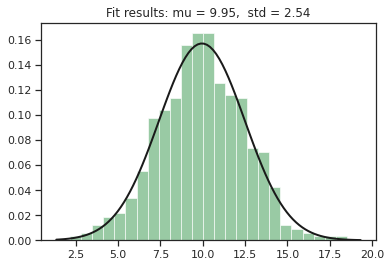

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
Autolib = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(Autolib)

# Plot the histogram.
plt.hist(Autolib, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

### Normal Distribution

(array([0.        , 0.        , 0.06666667, 0.01666667, 0.05      ,
        0.18333333, 0.26666667, 0.3       , 0.4       , 0.38333333,
        0.41666667, 0.25      , 0.26666667, 0.25      , 0.26666667,
        0.08333333, 0.05      , 0.03333333, 0.03333333, 0.01666667]),
 array([-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 20 Patch objects>)

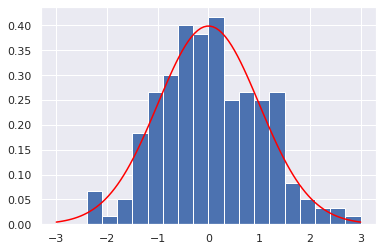

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
sns.set()
Autolib = sps.norm.rvs(size=200)
grid = np.linspace(-3, 3, 100)
plt.hist(Autolib, range=(-3, 3), bins=20, density=True)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.show()

(array([0.04915657, 0.13763841, 0.25561419, 0.41291523, 0.37358997,
        0.24578287, 0.27527682, 0.15730104, 0.02949394, 0.02949394]),
 array([-2.22015056, -1.71157159, -1.20299263, -0.69441366, -0.18583469,
         0.32274427,  0.83132324,  1.33990221,  1.84848117,  2.35706014,
         2.86563911]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Normal distribution fitting')

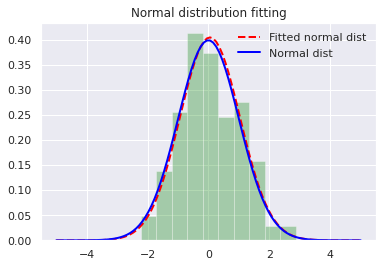

In [ ]:
# Distribution fitting
# norm.fit(data) returns a list of two parameters 
# (mean, parameters[0] and std, parameters[1]) via a MLE approach 
# to data, which should be in array form.
parameters = norm.fit(Autolib)

# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)

# Generateingthe pdf - probability density function (fitted distribution)
# 
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])

# Generating the pdf - probability density function (normal distribution non fitted)
# 
normal_pdf = norm.pdf(x)

# Then finally displaying our plot
# 
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(Autolib,density=1,color="green",alpha=.3)# alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting") 
plt.legend() 
plt.show()

### Point Estimation

In [ ]:
# We use the "seed" value of 10. 
np.random.seed(10)

#Use the stats module to generate random variables for our population. Here we specify our abitrary mean height and a standard deviation, which are loc and scale respectively
Autolib = stats.norm.rvs(loc=165, scale=1, size=12000)
print ( Autolib )  

#Calculate the population mean
Autolib.mean()



[166.3315865  165.71527897 163.45459971 ... 165.49730283 164.88786175
 164.21243322]


164.99887373021798

In [ ]:
np.random.seed(6)
# Sample 1000 values
sample_Autolib = np.random.choice(a= Autolib,
                               size=500000)            

# Show sample mean
print ( sample_Autolib.mean() )                         

# calculate how much the estimated mean differs from the main mean
Autolib.mean().mean() - sample_Autolib.mean()

164.999551452145


-0.0006777219270190926

### Confidence Intervals

In [9]:
import numpy as np
import scipy.stats as st



#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(Auto_num)-1, loc=np.mean(Auto_num), scale=st.sem(Auto_num)) 



(array([39514.469787  , -1358.0967509 , -2740.40709067, -2446.9297211 ,
        -2449.8028155 , -2732.31473046, -2731.64795251, -2721.1747392 ,
        -2721.00963324, -2671.31952463, -2671.47612908]),
 array([100604.18918208,   7478.73241808,   6766.65158491,   6934.26810343,
          6932.15637763,   6770.69306749,   6771.0288857 ,   6776.29240366,
          6776.37667942,   6802.50684878,   6802.41995703]))

##  Challenging the solution

> The dataset provided was not more highly insitefull more information would be of great advantage to effectively analysis






##  Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes the research question was clearly specified

### b). Do we need other data to answer our question?

no the data was correct, although the data more data feathers would have been more useful

### c). Did we have the right question?

yes the data was okay